# Taller #

### 1. Si x0 = 5 y xn = 3xn−1 mod 150, determine x1, . . . , x10. ###

In [3]:
#Generador Congruencial Mixto
x0 = 5
a = 3
c = 0
m = 150

def generar_aleatorios(cantidad):
    valores = []
    xn = x0
    for i in range(cantidad):
        xn = (a*xn + c) % m
        valores.append("X"+str(i+1)+" = "+str(xn/m))
    print(valores)
    print(" ")
    
    
if __name__ == "__main__":
    print(" ")
    generar_aleatorios(10)

 
['X1 = 0.1', 'X2 = 0.3', 'X3 = 0.9', 'X4 = 0.7', 'X5 = 0.1', 'X6 = 0.3', 'X7 = 0.9', 'X8 = 0.7', 'X9 = 0.1', 'X10 = 0.3']
 


>&nbsp; X1 = 0.1, X2 = 0.3, X3 = 0.9, X4 = 0.7, X5 = 0.1, X6 = 0.3, X7 = 0.9, X8 = 0.7, X9 = 0.1, X10 = 0.3

### 2. Si x0 = 3 y xn = 5xn−1 + 7 mod 200, determine x1, . . . , x10. ###

In [5]:
x0 = 3
a = 5
c = 7
m = 200

def generar_aleatorios(cantidad):
    valores = []
    xn = x0
    for i in range(cantidad):
        xn = (a*xn + c) % m
        valores.append("X"+str(i+1)+" = "+str(xn/m))
    print(valores)
    print(" ")
    
    
if __name__ == "__main__":
    print(" ")
    generar_aleatorios(10)

 
['X1 = 0.11', 'X2 = 0.585', 'X3 = 0.96', 'X4 = 0.835', 'X5 = 0.21', 'X6 = 0.085', 'X7 = 0.46', 'X8 = 0.335', 'X9 = 0.71', 'X10 = 0.585']
 


>&nbsp; X1 = 0.11, X2 = 0.585, X3 = 0.96, X4 = 0.835, X5 = 0.21, X6 = 0.085, X7 = 0.46, X8 = 0.335, X9 = 0.71, X10 = 0.585


### 3. Escriba un programa para generar n valores a partir de la función de masa de probabilidad p1 = 1/3, p2 = 2/3 ###

    (a) Sea n = 100, ejecute el programa y determine la proporcion de valores que sean iguales a 1.
    (b) Repita (a) con n = 1000.
    (c) Repita (a) con n = 10000.

In [21]:
fa = []

#Parametros de generador de aleatorios
xn = 790335
a = 25214903917 
m = 2 ** 48 - 1
c = 11
        
def set_fa(p):
    global fa
    n = len(p)
    x0 = p[0]
    fa.append(x0)
    for i in range(1,n):
        x0 = x0 + p[i]
        fa.append(x0)

def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

def transInv(n):
    u = 0
    i = 0
    va = [0]*n;
    cont = n;
    cont1 = 0
    while cont>0:
        u = generar_aleatorio()
        if(u < fa[0]):
            cont1+=1
        cont-=1
    print("C1: ",cont1)

if __name__ == "__main__":
    p = [1/3,2/3]
    set_fa(p)
    transInv(100)
    transInv(1000)
    transInv(10000)

C1:  33
C1:  325
C1:  3352


> a)n = 100 $\to$ 33

> b)n = 1000 $\to$ 325

> c)n = 10000 $\to$ 3352

### 4. Emplee la simulación para aproximar las siguientes integrales. Compare su estimación con la respuesta exacta, si ésta se conoce. ###

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(a)** $ \int_0^1\exp(\mathrm{e}^{x})\,\mathrm{d}x $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(b)** $ \int_0^1\mathrm{(1-\mathrm{x}^{2})}^{3/_2}\,\mathrm{d}x $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(c)** $ \int_{-2}^{2}\,\mathrm{e}^{x+\mathrm{x}^{2}}\,\mathrm{d}x $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(d)** $ \int_{0}^\infty\mathrm{x(1+\mathrm{x}^{2})}^{-2}\,\mathrm{d}x $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(e)** $ \int_{-\infty}^\infty\mathrm{e}^{\mathrm{-x}^{2}}\,\mathrm{d}x $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(f)** $ \int_0^1\int_0^1\mathrm{e}^{\mathrm{(x+y)}^2}\,\mathrm{d}y\,\mathrm{d}x  $


In [26]:
import math 

xn1 = 790335
xn2 = 986523

a = 25214903917 
m = 2 ** 48 - 1
c = 11

def generar_aleatorio(x):
    xn = (a*x + c) % m
    return (xn/m)

def montecarlo(mn,a,b,f):
    n = 0
    x = 0
    y = 0
    xn = xn1
    xx = []
    yy = []
    suma = 0
    while n<mn:
        u = generar_aleatorio(xn)
        xn = u*m
        x = a + (b-a)*u
        y = (b-a)*f(x)
        xx.append(x)
        yy.append(f(x))
        suma = suma + y
        n = n + 1
    return suma/n

def montecarlo_d(mn,a,b,c,d,f):
    n = 0
    x = 0
    y = 0
    xni = xn1
    xnj = xn2
    suma = 0
    while n<mn:
        u1 = generar_aleatorio(xni)
        u2 = generar_aleatorio(xnj)
        xni = u1*m
        xnj = u2*m
        x = a + (b-a)*u1
        y = c + (d-c)*u2
        fo = (b-a)*(d-c)*f(x,y)
        suma = suma + fo
        n = n + 1
    return suma/n

if __name__ == "__main__":
    print("a: ", montecarlo(10000,0,1,lambda x: math.exp(math.exp(x))))
    print("b: ", montecarlo(10000,0,1,lambda x: (1 - x**2)**(3/2)))
    print("c: ", montecarlo(10000000,-2,2,lambda x: math.exp(x + x**2)))
    print("d: ", montecarlo(1000000,0,7,lambda x: x*((1 + x**2)**-2)))
    print("e: ", montecarlo(1000000,-5,5,lambda x: math.exp(-x**2)))
    print("f: ", montecarlo_d(10000,0,1,0,1,lambda x,y: math.e**((x+y)**2)))

a:  6.304489226710461
b:  0.5887300906562706
c:  93.24751354620706
d:  0.48982683342449324
e:  1.7749022702699273
f:  4.897309761098213


> a)m = 10000 $\to$ 6.304489226710461 &nbsp;  Expectativa $\to$ 6.31656

> b)m = 10000 $\to$ 0.5887300906562706  &nbsp; Expectativa $\to$  0.589049

> c)m = 10000000 $\to$ 93.24751354620706 &nbsp;  Expectativa $\to$  93.1628

> d)m = 1000000 (0,7) $\to$ 0.48982683342449324 &nbsp; Expectativa $\to$ 0.5

> e)m = 1000000 (-5,5) $\to$ 1.7749022702699273 &nbsp; Expectativa $\to$ 1.7724538509055159

> f)m = 10000 $\to$ 4.897309761098214 &nbsp; Expectativa $\to$ 4.89916

### 5. Implemente el método de la transformada inversa para generación de variables aleatorias discretas con un ejemplo para los siguientes casos: ###

    (a) Poisson
    (b) Binomial
    (c) Técnica de aceptación y rechazo
    (d) Método de composicion

In [31]:
#Transformada Inversa para generar variable aleatoria Poisson
import math
import matplotlib.pyplot as pl
import time
from datetime import datetime
%matplotlib inline

xn = datetime.now().microsecond
a = 25214903917 
m = 2 ** 48 - 1
c = 11

def inicializar(kk,lbb):
    global lb,k,valido
    print("K:",kk)
    print(chr(955)+": "+str(lbb))
    k = kk
    lb = lbb
    p = math.exp(-lb)
    f = p
    i = 0
    valido = True
    
def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

def transInv():
    ct = 0
    va = [None]*k
    uu = [None]*k
    if(valido):
        u = generar_aleatorio()
        i = 0
        p = math.exp(-lb)
        F = p
        while ct<k:
            if(u<F):
                if(i<=k):
                    va[i-1] = i
                    uu[i-1] = u
                ct = k
            else:
                p = lb*p/(i+1)
                F = F + p
                i += 1
        imprimir(va,uu)

def imprimir(va,uu):
    for i in range(0,k):
        if(va[i]!=None):
            print("Xi"+" = "+str(va[i])+ "  u -> "+str(uu[i]))

if __name__ == "__main__":
    inicializar(20,10)
    transInv()
    

K: 20
λ: 10
Xi = 13  u -> 0.7968410039577264


> **(a)** &nbsp;&nbsp; K:20  &nbsp; λ:10

        Xi = 13  u -> 0.7968410039577264


In [36]:
#Transformada Inversa para generar variable aleatoria binomial
import math
import matplotlib.pyplot as pl
import time
from datetime import datetime
%matplotlib inline

xn = datetime.now().microsecond
a = 25214903917 
m = 2 ** 48 - 1
c = 11

def inicializar(nn,pp):
    global n,p,valido
    n = nn
    p = pp
    print("n: ",n)
    print("p: ",p)
    valido = True
    
def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return (x/m)

def transInv():
    ct = n
    a = 1
    va = [None]*n
    uu = [None]*n
    if(valido):
        c = p/(1-p)
        i = 0
        pr = (1-p)**n
        F = pr
        u = generar_aleatorio()
        while ct>0:
            if(u<F):
                va[i] = i+1
                uu[i] = u
                break
            else:
                pr = (c*(n-1)/(i+1))*pr
                F = F + pr
                i += 1
            ct-=1
        imprimir(va,uu)

def imprimir(va,uu):
    for i in range(0,n):
        if(va[i]!=None):
            print("Xi"+" = "+str(va[i])+ "  u -> "+str(uu[i]))

if __name__ == "__main__":
    inicializar(20,0.6)
    transInv()

n:  20
p:  0.6
Xi = 11  u -> 0.8562837624558058


> **(b)** &nbsp;&nbsp; n: 20  &nbsp; p: 0.6

        Xi = 11  u -> 0.8562837624558058

In [65]:
# Tecnica de aceptación y rechazo
import math
import time
from datetime import datetime

xn1 = datetime.now().microsecond
xn2 = 3000000 + datetime.now().microsecond

a = 25214903917 
m = 2 ** 48 - 1
b = 11

def inicializar(nn,pp):
    global p , n, valido, c, q
    my = 0
    n = nn
    p = pp
    q = 1/n
    valido = True
    for i in range(n):
        x = p[i]
        if(x>my):
            my = x
    c = round(my/q,2)
    print("n: ",n)
    print("p: ",p)
    print(" ")
    
def generar_aleatorio(xn):
    xn = (a*xn + b) % m
    return (xn/m)

def tecAR():
    global xn1, xn2
    ct = n
    va = [None]*n
    uu = [None]*n
    if(valido):
        while ct>0:
            u1 = generar_aleatorio(xn1)
            xn1 = u1*m
            y = int(n*u1) + 1
            u2 = generar_aleatorio(xn2)
            xn2 = u2*m
            py = p[y-1]
            fu = py/c*q
            if(u2<=fu):
                va[y-1] = y
                uu[y-1] = u2
                ct=-1
                break
        imprimir(va,uu)

def imprimir(va,uu):
    for i in range(0,n):
        if(va[i]!=None):
            print("Xi"+" = "+str(va[i])+ "  u -> "+str(uu[i]))

if __name__ == "__main__":
    pp = [0.11,0.12,0.09,0.08,0.12,0.10,0.09,0.09,0.1,0.1]
    inicializar(len(pp),pp)
    tecAR()

n:  10
p:  [0.11, 0.12, 0.09, 0.08, 0.12, 0.1, 0.09, 0.09, 0.1, 0.1]
 
Xi = 5  u -> 0.0070449390666880414


> **(c)** &nbsp;&nbsp; n: 10 &nbsp; p:  [0.11, 0.12, 0.09, 0.08, 0.12, 0.1, 0.09, 0.09, 0.1, 0.1]

        Xi = 5  u -> 0.0070449390666880414


In [75]:
# Tecnica de Composicion
import math
import time
from datetime import datetime

xn1 = datetime.now().microsecond
xn2 = 3000000 + datetime.now().microsecond

a = 25214903917 
m = 2 ** 48 - 1
b = 11

def inicializar(pp,alp):
    global p , n, valido, ap
    ap = alp
    n = len(pp)
    p = pp
    valido = True
    print("n: ",n)
    print("p: ",p)
    print(" ")
    
def generar_aleatorio(xn):
    xn = (a*xn + b) % m
    return (xn/m)

def metCp():
    global xn1, xn2
    ct = n
    va = []
    uu = []
    if(valido):
        u1 = generar_aleatorio(xn1)
        xn1 = u1*m
        u2 = generar_aleatorio(xn2)
        xn2 = u2*m
        if(u1<ap):
            x = int(n*u2) + 1
        else:
            x = int((n/2)*u2) + int(n/2 + 1)
        va.append(x)
        uu.append(u1)
        imprimir(va,uu)

def imprimir(va,uu):
    for i in range(0,len(va)):
        if(va[i]!=None):
            print("Xi"+" = "+str(va[i])+ "  u -> "+str(uu[i]))

if __name__ == "__main__":
    v = [0.05,0.05,0.05,0.05,0.05,0.15,0.15,0.15,0.15,0.15];
    alpha = 0.5
    inicializar(v,alpha)
    metCp()

n:  10
p:  [0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.15, 0.15]
 
Xi = 8  u -> 0.023126638828507934


> **(d)** &nbsp;&nbsp; n: 10 &nbsp;&nbsp; $\alpha = 0.5$ p =  [0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.15, 0.15]

        Xi = 8  u -> 0.023126638828507934

### 6. Se baraja un conjunto un conjunto de 100 cartas (enumeradas del 1 al 100) y luego se voltean, una a la vez. Decimos que ocurre un "exito" si la carta i es la i-ésima carta volteada, i = 1; :::::; 100. ###

    (a) Escriba un programa de simulacion para estimar la esperanza y la varianza del numero total de exitos.
    (b) Ejecute el programa y determine las repuestas exactas y comparelas con sus estimaciones.

In [22]:

import math
import time
from datetime import datetime

xn = datetime.now().microsecond
a = 25214903917 
m = 2 ** 48 - 1
c = 11

def inicializar(m):
    global n,cartas
    n = m
    cartas = [None]*n
    for i in range(n):
        cartas[i] = i + 1
        
def generar_aleatorio():
    global xn
    x = (a*xn + c) % m
    xn = x
    return adecuar(x/m)

def adecuar(x):
    return int(x*100) + 1

def voltearCartas():
    cat_ct = 1
    res = []
    ext = 0

    while cat_ct <= n:
        x = generar_aleatorio()
        if(x not in res):
            res.append(x)
            if(x == cat_ct):
                ext+=1
        cat_ct += 1
    p = ext/n
    vz = n*p*(1-p)
    p1 = 1/math.factorial(ext)
    z = n*p1*(1-p1)
    
    print("a)")
    print("Exitos:",ext)
    print("Probabilidad de Exitos Estimado: ",p)
    print("Valor Esperado estimado: ",ext)
    print("Varianza estimada: ",vz)
    print(" ")
    print("b)")
    print("Exitos: ",ext)
    print("Probabilidad de Exitos: ",p1)
    print("Valor Esperado: ",n*p1)
    print("Varianza: ",z)

if __name__ == "__main__":
    inicializar(100)
    voltearCartas()



a)
Exitos: 1
Probabilidad de Exitos Estimado:  0.01
Valor Esperado estimado:  1
Varianza estimada:  0.99
 
b)
Exitos:  1
Probabilidad de Exitos:  1.0
Valor Esperado:  100.0
Varianza:  0.0


### 7. Aplique la prueba de Kolmogorov-Smirnov para comprobar si los siguientes generadores garantizan uniformidad: ###

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a) $x_{0} = 7$ y $x_n = 5x_{n-1}\,mod \,150$, generando n = 1000 numeros.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b) $x_{0} = 3$ y $xn = 157x_{n-1}\, + \,1\, mod\, 2^{31}$, generando n = 1000 numeros.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(c) $x_{0} = 3$ y $xn = 22695477x_{n-1}\, +\, 1 \,mod \,2^{32}$, generando n = 1000 numeros.

a)


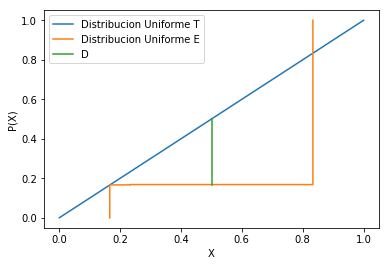

Mayor Diferencia:  0.333665865706
Estadistico Teorico:  0.04300697617828996
El generador de aleatorios no garantiza la uniformidad
 
b)


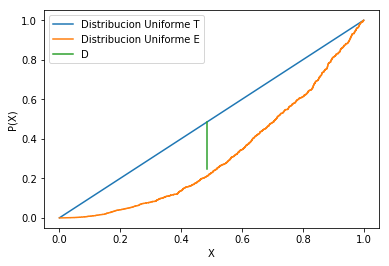

Mayor Diferencia:  0.239519804267
Estadistico Teorico:  0.04300697617828996
El generador de aleatorios no garantiza la uniformidad
 
c)


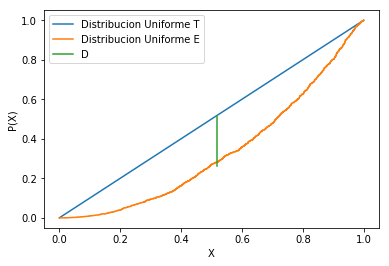

Mayor Diferencia:  0.2531231297
Estadistico Teorico:  0.04300697617828996
El generador de aleatorios no garantiza la uniformidad
 


In [2]:
import math
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline

class KolmogorovSmirnov:
    
    p = []
    xn = 0
    a = 0 
    m = 0
    c = 0
    n = 0
    u = []
    alp = 0
    calp = 0
    plt1 = pl
    
    
    def __init__(self,p,u,alp,calp,xn,a,m,n,c = 0):
        self.xn = xn
        self.a = a
        self.m = m
        self.c = c
        self.n = n
        self.p = p
        self.u = u
        self.alp = alp
        self.calp = calp
        
    def generar_aleatorio(self):
        x = (self.a*self.xn + self.c) % self.m
        self.xn = x
        return(x/self.m)
        
    def getDistUniVb(self):
        v = [None]*self.n
        for i in range(self.n):
            v[i] = self.generar_aleatorio()
        return v
        
    def kolSm(self):
        x1 = self.p
        y1 = np.cumsum(np.sort(self.u)/np.max(np.cumsum(self.u)))
        x = self.getDistUniVb()
        x2 = np.sort(x)
        y2 = np.cumsum(x2/np.max(np.cumsum(x2)))
        D=np.absolute(y2-y1)
        self.graf(pl,x1,y1,x2,y2,D)
        self.validTest(y2,np.max(D))
        
    def validTest(self,y2,D):
        est = 1.36/math.sqrt(n)
        print("Mayor Diferencia: ",D)
        print("Estadistico Teorico: ",est)
        if D > est: 
            print("El generador de aleatorios no garantiza la uniformidad")
        else: 
            print("El generador de aleatorios sí garantiza la uniformidad")
        print(" ")
        
    def graf(self,plt,x1,y1,x2,y2,D):
        plt.plot(x1,y1,label='Distribucion Uniforme T')
        plt.step(x2,y2,label='Distribucion Uniforme E')
        x3 = [x1[D.argmax()],x1[D.argmax()]]
        y3 = [np.min([y1[D.argmax()],y2[D.argmax()]]),np.max([y1[D.argmax()],y2[D.argmax()]])]
        plt.step(x3,y3,label='D')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('P(X)')
        plt.show()

n = 1000
print("a)")
a = KolmogorovSmirnov(np.arange(1/n,1+1/n,1/n),[1]*n,0.05,1.36,7,5,150,n)
a.kolSm()
print("b)")
b = KolmogorovSmirnov(np.arange(1/n,1+1/n,1/n),[1]*n,0.05,1.36,3,157,2**31,n,c=1)
b.kolSm()
print("c)")
d = KolmogorovSmirnov(np.arange(1/n,1+1/n,1/n),[1]*n,0.05,1.36,3,22695477,2**32,n,c=1)
d.kolSm()

### 8. Aplique la prueba de $x^2$ para comprobar si los tres generadores congruenciales del punto 7 garantizan uniformidad. ###

In [22]:
import math
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline

class chi2:
    
    xn = 0
    a = 0 
    m = 0
    c = 0
    n = 0
    alp = 0
    k = 0
    plt1 = pl
    
    
    def __init__(self,alp,k,xn,a,m,n,c = 0):
        self.xn = xn
        self.a = a
        self.m = m
        self.c = c
        self.n = n
        self.alp = alp
        self.k = k

    def generar_aleatorio(self):
        x = (self.a*self.xn + self.c) % self.m
        self.xn = x
        return(x/self.m)
        
    def getvAl(self):
        v = [None]*self.n
        for i in range(self.n):
            v[i] = self.generar_aleatorio()
        return v
    
    def getFre(self,v):
        fre = pl.hist(v,self.k)[0]
        pl.close()
        return fre
    
    def chi_2(self):
        v = self.getvAl()
        re = self.getFre(v)
        suma = 0
        ex = self.n/self.k
        
        for i in range(self.k):
            suma += (re[i] - ex )**2/ex
            
        if(suma < self.alp):
            print("El generador garantiza uniformidad")
        else:
            print("El generador no garantiza uniformidad")

print("a)")
a = chi2(16.919,10,7,5,150,1000)
a.chi_2()
print("b)")
b = chi2(16.919,10,3,157,2**31,1000,1)
b.chi_2()
print("c)")
d = chi2(16.919,10,3,22695477,2**32,1000,1)
d.chi_2()
        

a)
El generador no garantiza uniformidad
b)
El generador garantiza uniformidad
c)
El generador garantiza uniformidad


### 9. Aplique el test de rachas a cada uno de los tres generadores congruenciales del punto 7, para evaluar si cumplen con el criterio de aleatoriedad. ###

In [3]:
import math

class TestRachas():
    xn = 0
    a = 0 
    m = 0
    c = 0
    n = 0
    z = 0
    
    def __init__(self,xn,a,m,n,c = 0):
        self.xn = xn
        self.a = a
        self.m = m
        self.c = c
        self.n = n
        
    def generar_aleatorio(self):
        x = (self.a*self.xn + self.c) % self.m
        self.xn = x
        return(x/self.m)
        
    def getDistAl(self):
        v = [None]*self.n
        for i in range(self.n):
            v[i] = self.generar_aleatorio()
        return v

    def getScSimBin(self,v):
        sym = "";
        cunos = 0
        cceros = 0
        for i in range(self.n - 1):
            if(v[i] < v[i+1]):
                sym+="1"
                cunos += 1
            else:
                cceros += 1
                sym+="0"
        return sym,cunos,cceros
    
    def contRachas(self,sym):
        rachas = 0
        auxc = 0
        auxu = 0
        s = len(sym)
        
        if(sym[0] == "1"):
            bin = True
        else:
            bin = False
        for i in range(s):
            if(bin):
                if(sym[i] == "1"):
                    auxu += 1
                else:
                    bin = False
                    auxc = 0
                    if(auxu > 0):
                        rachas += 1
                        auxu = 0

                if(i+1 == s and auxu > 0):
                    rachas+=1
                
            if(bin == False):
                if(sym[i] == "0"):
                    auxc += 1
                else:
                    bin = True
                    auxu +=1
                    if(auxc > 0):
                        rachas += 1
                        auxc = 0

                if(i+1 == s and auxc > 0):
                    rachas+=1
        return rachas
    
    def calEst(self,cunos,cceros,r):
        n = cunos + cceros
        Z = ((r - (2*n)-1)/3)/math.sqrt((16*n-29)/90)
        print(" Z = ", Z)
        u = (2*cunos*cceros)/(n) + 1
        zo = 1.960 #Tomado de la tabla de distribucion normal con alpha/2 y un nivel de confianza del 95%
        print("Zo Teorico = ", zo)
    
        if abs(Z)>zo:
            print("No cumple con el criterio de aleatoriedad")
        else:
            print("Si cumple con el  criterio de aleatoriedad")
        print(" ")
    
    def ttRachas(self):
        v = self.getDistAl()
        sym,cunos,cceros = self.getScSimBin(v)
        r = self.contRachas(sym)
        print("Rachas: ",r)
        self.calEst(cunos,cceros,r)  

n = 1000
print("a)")
a = TestRachas(7,5,150,n)
a.ttRachas()
print("b)")
b = TestRachas(3,157,2**31,n,1)
b.ttRachas() 
print("c)")
d = TestRachas(3,22695477,2**32,n,1)
d.ttRachas() 

a)
Rachas:  999
 Z =  -25.0352305819508
Zo Teorico =  1.96
No cumple con el criterio de aleatoriedad
 
b)
Rachas:  676
 Z =  -33.12161005992091
Zo Teorico =  1.96
No cumple con el criterio de aleatoriedad
 
c)
Rachas:  644
 Z =  -33.92273743854334
Zo Teorico =  1.96
No cumple con el criterio de aleatoriedad
 


### 10. Utilizando el método de Monte Carlo, y tomando como base el ejemplo del cálculo del área del circulo visto en clase: ###

    (a)Implemente el método de Monte Carlo para calcular y mostrar el área estimada de una elipse con un semieje mayor a =       5 y semieje menor b = 3 centrado en el origen x,y = (0,0) generando 1000 coordenadas aleatorias (X,Y) en el rango de
        X = [-a,a] y Y = [-b,b].
    (b)Calcule el área real de la elipse.
    (c)Calcule la diferencia entre el área real y el área estimada de la elipse con el método de Monte Carlo
    (d)Gráfique los puntos aleatorios generados que caen dentro de la elipse en rojo y los que caen fuera de la elipse en       azul.

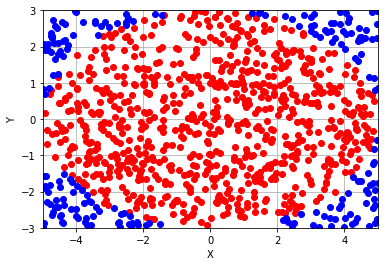

Area Elipse:  47.400000000000006
Diferencia:  0.2761101961531125


In [28]:
import math
import time
from datetime import datetime
import matplotlib.pyplot as pl
%matplotlib inline

xn1 = datetime.now().microsecond
xn2 = 3000000 + datetime.now().microsecond

a = 25214903917 
m = 2 ** 48 - 1
c = 11

def generar_aleatorio(x):
    xn = (a*x + c) % m
    return (xn/m)

def montecarlo_d(mn,a,b,c,d,f):
    n = 0
    x = 0
    y = 0
    xni = xn1
    xnj = xn2
    vfx = []
    vdx = []
    vfy = []
    vdy = []
    suma = 0
    while n<mn:
        u1 = generar_aleatorio(xni)
        u2 = generar_aleatorio(xnj)
        xni = u1*m
        xnj = u2*m
        x = a + (b-a)*u1
        y = c + (d-c)*u2
        if(f(x,y)<=1):
            vdx.append(x)
            vdy.append(y)
            suma = suma + 1
        else:
            vfx.append(x)
            vfy.append(y)
            
        n = n + 1
    graf(vdx,vdy,vfx,vfy,b,d)
    return suma/n*4*b*d

def graf(v1,k1,v2,k2,a,b):
    
    pl.ylabel('Y')
    pl.xlabel('X')
   
    pl.plot(v1,k1,'ro',color="red")
    pl.plot(v2,k2,'ro',color="blue")
    pl.grid(True)
    pl.axis([-a,a,-b,b])
    pl.show() 

if __name__ == "__main__":
    a = 5
    b = 3
    area = montecarlo_d(1000,-a,a,-b,b,lambda x,y: x**2/a**2 + y**2/b**2)
    print("Area Elipse: ", area)
    print("Diferencia: ",abs(area - math.pi*a*b))

> **(a)** &nbsp;&nbsp; $ A_{est} = 47.400000000000006$ 

> **(b)** &nbsp;&nbsp; $ A = a*b*\pi = 47.1238898$

> **(c)** &nbsp;&nbsp; $ [A-A_{est}] = 0.2761101961531125$

> **(d)** &nbsp;&nbsp;
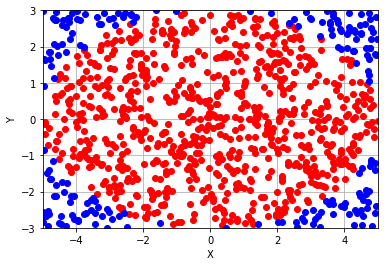